In [51]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##**1. Loading and Preprocessing**

In [52]:
# Load diabetes dataset
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

# Convert to DataFrame for easy handling
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [54]:
df.shape

(442, 11)

In [55]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [56]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [57]:
df.duplicated().sum()

np.int64(0)

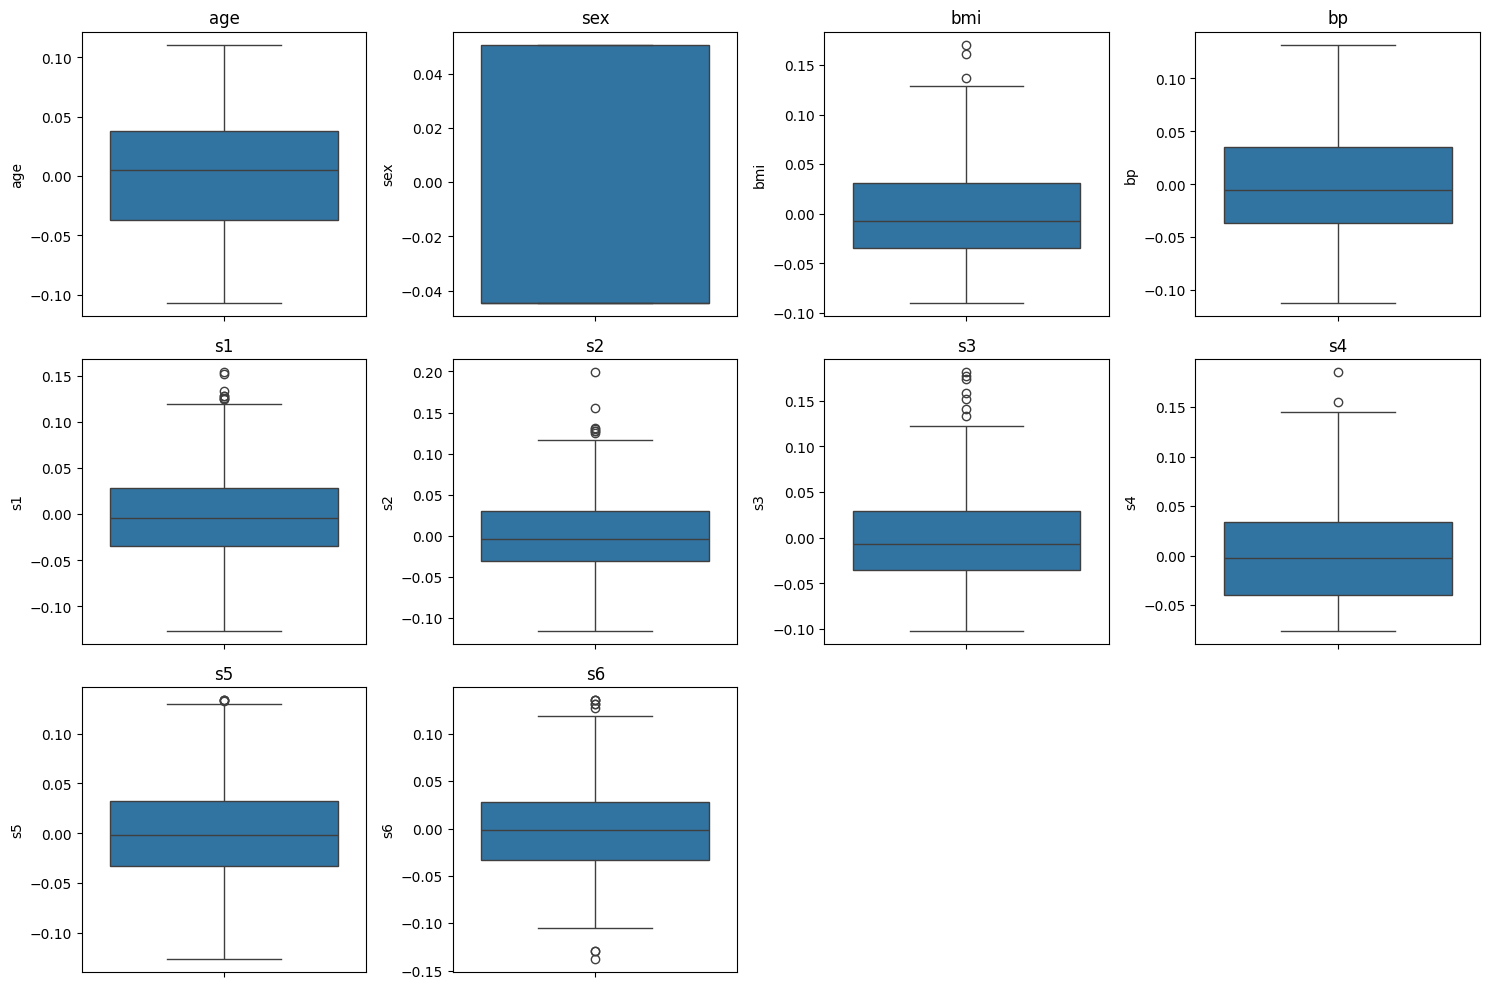

In [58]:
# Handling Outliers
plt.figure(figsize=(15,10))

for i, col in enumerate(diabetes.feature_names):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Several features show mild outliers.This is expected in medical datasets and reflects real-world patient variability. Therefore, instead of removing them, we retain all observations and rely on feature scaling and robust learning techniques.

In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=diabetes.feature_names)

X_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


##**2. Exploratory Data Analysis (EDA)**

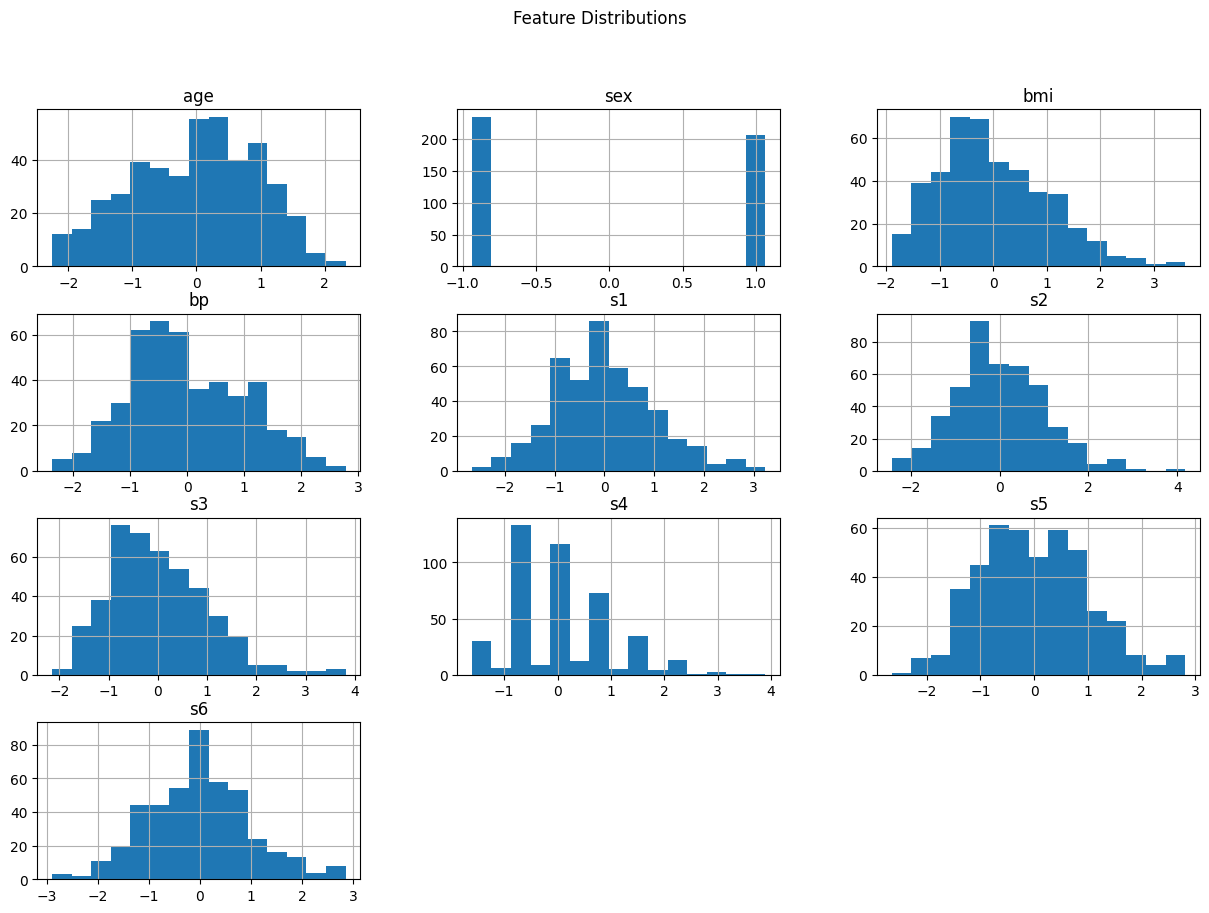

In [60]:
# Histogram for each feature
X_scaled.hist(bins=15, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()



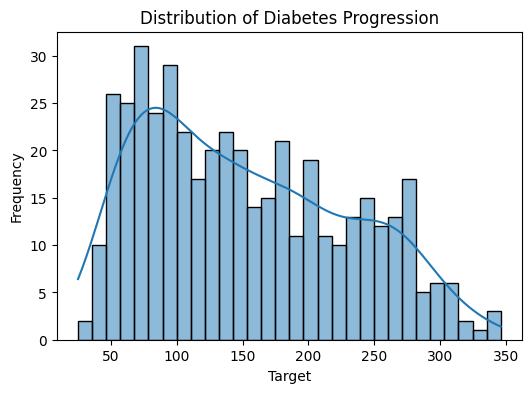

In [61]:
plt.figure(figsize=(6,4))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Diabetes Progression")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()


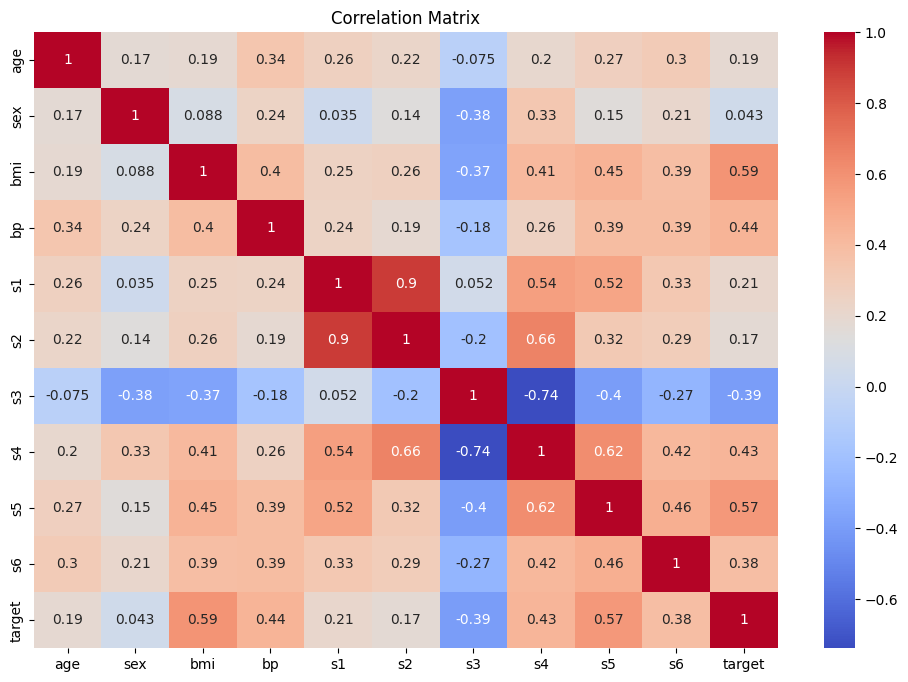

In [62]:
# Combine features and target for correlation
data_combined = X_scaled.copy()
data_combined['target'] = y

# Compute correlation
corr = data_combined.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows that BMI, s5, and blood pressure (bp) have the strongest positive correlation with diabetes progression, indicating they are key influencing factors. Feature s3 has a noticeable negative correlation with the target, suggesting an inverse relationship. Overall, the correlations highlight that metabolic and body-related features play a more significant role than demographic features like age and sex.

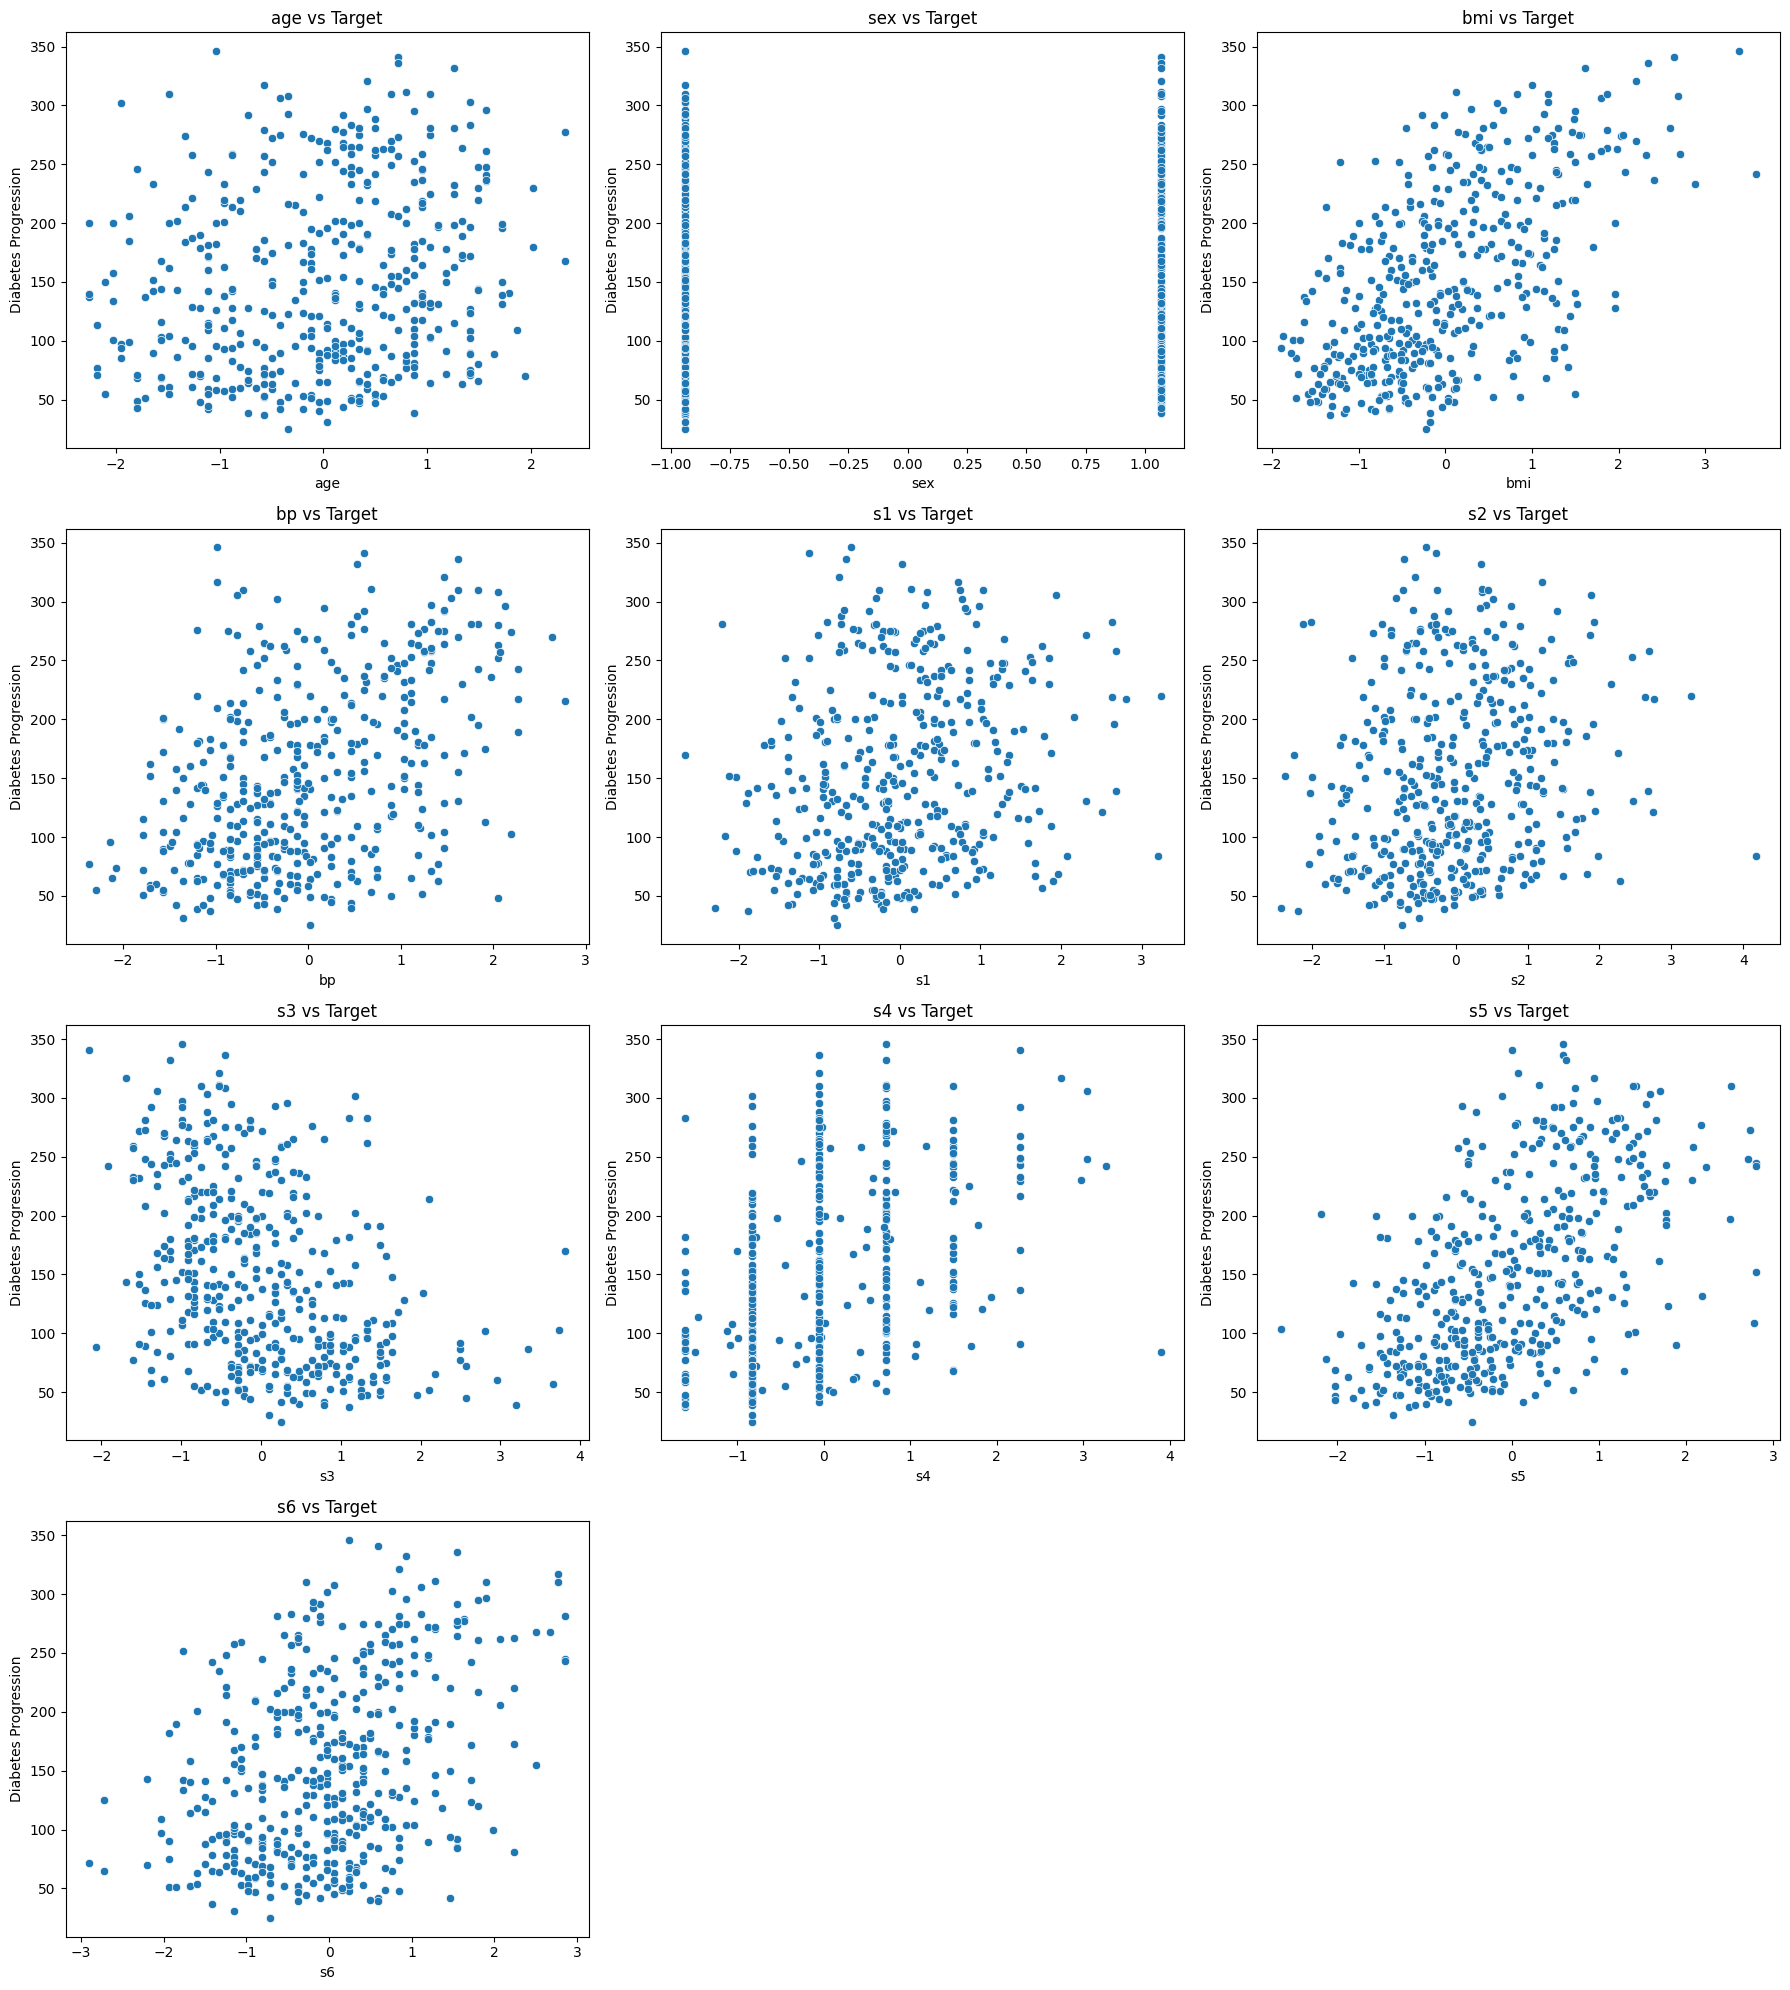

In [63]:
import math

cols = X_scaled.columns
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=X_scaled[col], y=y)
    plt.title(f"{col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Diabetes Progression")

plt.tight_layout()
plt.show()


##**3. Building the ANN Model**

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

##**4. Training the ANN Model**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [66]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [67]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 33216.3594 - mae: 163.9288 - val_loss: 22342.1582 - val_mae: 133.5171
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29958.1035 - mae: 152.8727 - val_loss: 22205.1094 - val_mae: 132.9961
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31516.9277 - mae: 159.4455 - val_loss: 22018.4551 - val_mae: 132.2850
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33065.3281 - mae: 163.5099 - val_loss: 21760.4258 - val_mae: 131.2937
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28949.3379 - mae: 151.9926 - val_loss: 21416.7344 - val_mae: 129.9737
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30131.9355 - mae: 154.1089 - val_loss: 20969.7578 - val_mae: 128.2807
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30423.4316 - mae: 154.7172 - val_loss: 20383.3633 - val_mae: 126.0780
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29853.8262 - mae: 152.7545 - val_loss

##**5. Evaluating the Model**

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Mean Squared Error: 2954.9603787222786
R2 Score: 0.4422658091003866


##**6. Improving the Model**

In [69]:
from tensorflow.keras.layers import Dropout

improved_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

improved_model.compile(
    optimizer='adam',
    loss='mse'
)




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
history = improved_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 2292.6558 - val_loss: 3036.5315
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2667.8831 - val_loss: 2992.0598
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2413.2139 - val_loss: 2996.4875
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2322.9592 - val_loss: 2973.3608
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2420.3892 - val_loss: 2972.3225
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2537.9441 - val_loss: 2956.0784
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2359.3267 - val_loss: 2979.5142
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2512.5776 - val_loss: 2943.5781
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2448.3735 - val_loss: 2997.4404
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2425.6836 - val_loss: 3013.2571
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2494.4014 - val_loss: 2

In [74]:
y_pred_improved = improved_model.predict(X_test)

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print("Improved MSE:", mse_improved)
print("Improved R2 Score:", r2_improved)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Improved MSE: 2750.0961588239493
Improved R2 Score: 0.4809329197499991


The performance of the Artificial Neural Network improved after modifying the network architecture and training parameters. The Mean Squared Error decreased by about 205 units and the R2 score increased from 0.44 to 0.48, indicating more accurate predictions. This shows that tuning the model helps better capture the factors influencing diabetes progression.